# Assignment 1: Dimensionality Reduction using PCA

## Question 1

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Retrieve and load the mnist_784 dataset of 70,000 instances.
mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
print("Shape of MNIST dataset: ", mnist[0].shape)
df = pd.DataFrame(mnist[0])

Shape of MNIST dataset:  (70000, 784)


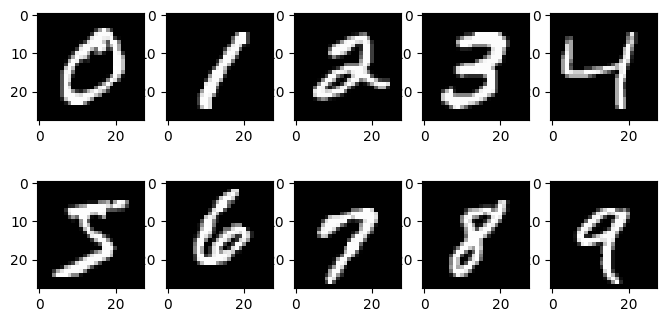

In [63]:
# 2. Display each digit
plt.figure(figsize=(8, 4))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    # First image representing digit i
    digit = df.loc[mnist[1] == str(i)].iloc[0]
    # Display image
    plt.imshow(digit.values.reshape(28, 28), cmap='gray')

In [12]:
# 3. Use PCA to retrieve the 1st and 2nd principal components and output their explained variance ratio
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(mnist[0])

PCA(n_components=2)

In [13]:
print("Explained variance ratio of the 1st and 2nd principal components: ", pca.explained_variance_ratio_)

Explained variance ratio of the 1st and 2nd principal components:  [0.09746116 0.07155444]


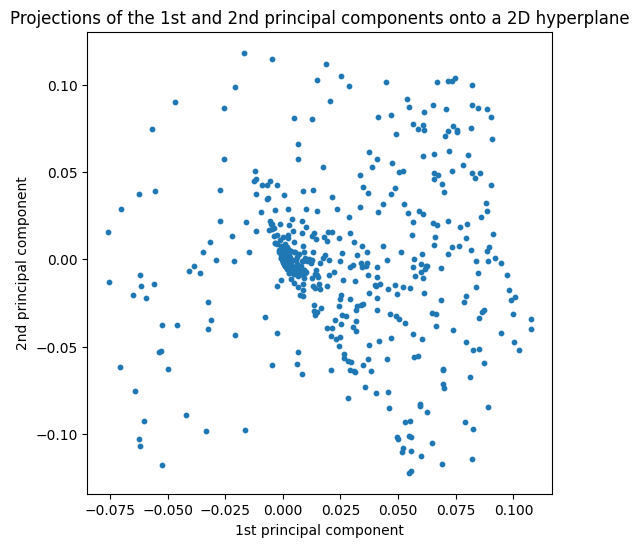

In [33]:
# 4. Plot the projections of the 1st and 2nd principal components onto a 2D hyperplane.
plt.figure(figsize=(6, 6))
plt.scatter(pca.components_[0], pca.components_[1], s=10)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane')
plt.show()

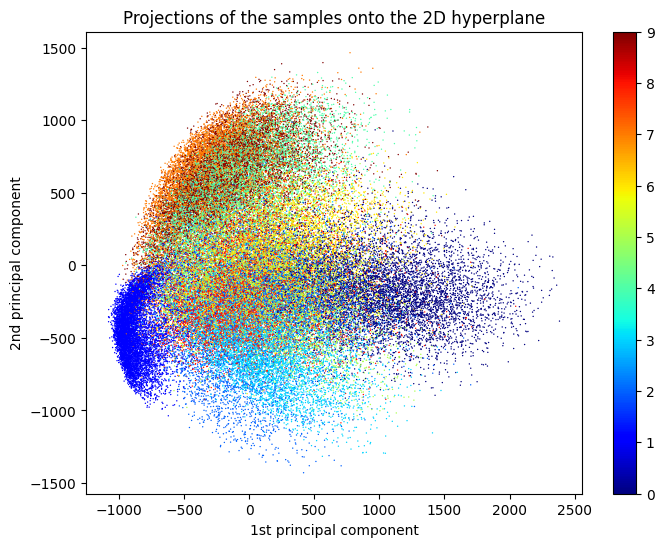

In [50]:
# Plot each sample in the dataset onto the 2D hyperplane
plt.figure(figsize=(8, 6))
plt.scatter(pca.transform(mnist[0])[:, 0], pca.transform(mnist[0])[:, 1],
            c=mnist[1].astype(int), edgecolor='none', s=1, cmap='jet')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the samples onto the 2D hyperplane')
plt.colorbar()
plt.show()

In [56]:
# 5. Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions.
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=154)
ipca.fit(mnist[0].values)

IncrementalPCA(n_components=154)

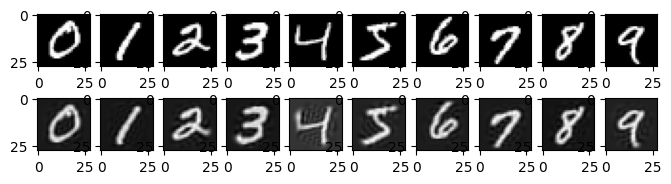

In [60]:
# 6. Display the original and compressed digits

plt.figure(figsize=(8, 2))
for i in range(0, 10):
    plt.subplot(2, 10, i+1)
    # First image representing digit i
    digit = df.loc[mnist[1] == str(i)].iloc[0]
    # Display image
    plt.imshow(digit.values.reshape(28, 28), cmap='gray')
    plt.subplot(2, 10, i+11)
    # First image representing digit i
    digit = ipca.inverse_transform(ipca.transform(digit.values.reshape(1, -1)))
    # Display image
    plt.imshow(digit.reshape(28, 28), cmap='gray')

In [ ]:
# 7. TODO: Create a video discussing the code and result for each question.
# Discuss challenges you confronted and solutions to overcoming them, if applicable.

## Question 2

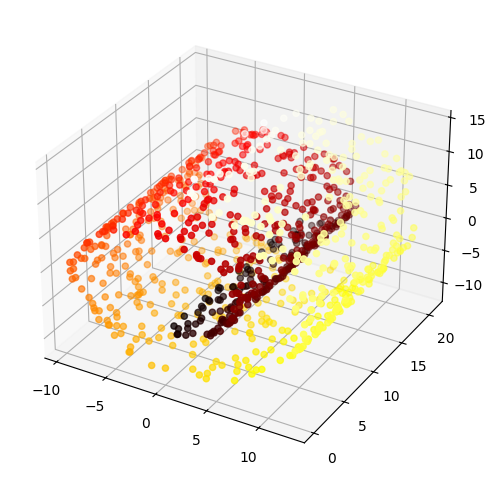

In [28]:
# 1. Generate Swiss roll dataset.
import numpy as np
from sklearn.datasets import make_swiss_roll

X_sw, y_sw = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

# 2. Plot the resulting generated Swiss roll dataset.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sw[:,0], X_sw[:,1], X_sw[:,2], c=y_sw, cmap='hot')
plt.show()

In [65]:
# 3. Use Kernel PCA(kPCA) with linear, rbf, and sigmoid kernels.
from sklearn.decomposition import KernelPCA

pca_lin = KernelPCA(n_components=2, kernel='linear', random_state=42)
pca_rbf = KernelPCA(n_components=2, kernel='rbf', random_state=42, gamma=0.1)
pca_sig = KernelPCA(n_components=2, kernel='sigmoid', random_state=42, gamma=0.0005)
pca_lin.fit(X_sw)
pca_rbf.fit(X_sw)
pca_sig.fit(X_sw)

KernelPCA(gamma=0.0005, kernel='sigmoid', n_components=2, random_state=42)

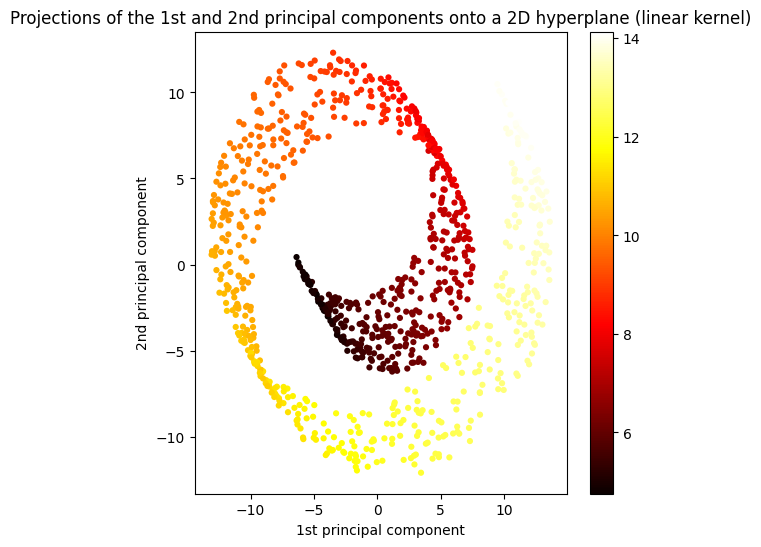

In [66]:
# 4. Plot the projections of the 1st and 2nd principal components onto a 2D hyperplane.

plt.figure(figsize=(6, 6))
plt.scatter(pca_lin.transform(X_sw)[:, 0], pca_lin.transform(X_sw)[:, 1],
            c=y_sw, edgecolor='none', s=20, cmap='hot')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane (linear kernel)')
plt.colorbar()
plt.show()

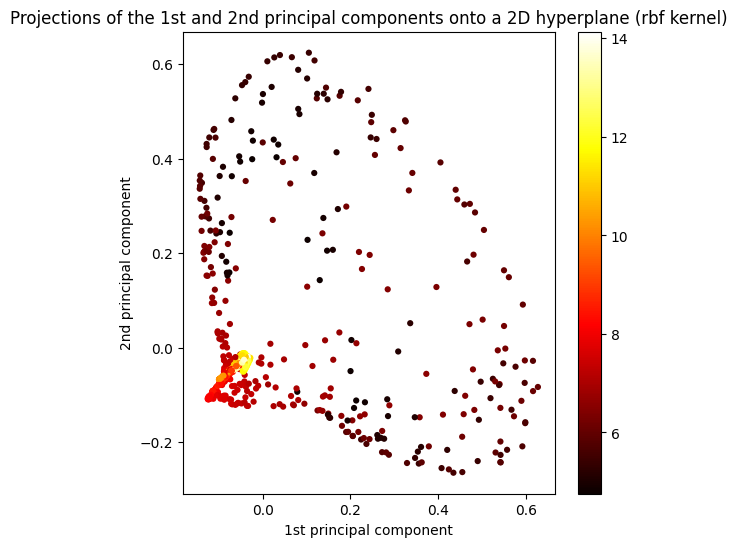

In [67]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_rbf.transform(X_sw)[:, 0], pca_rbf.transform(X_sw)[:, 1],
            c=y_sw, edgecolor='none', s=20, cmap='hot')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane (rbf kernel)')
plt.colorbar()
plt.show()

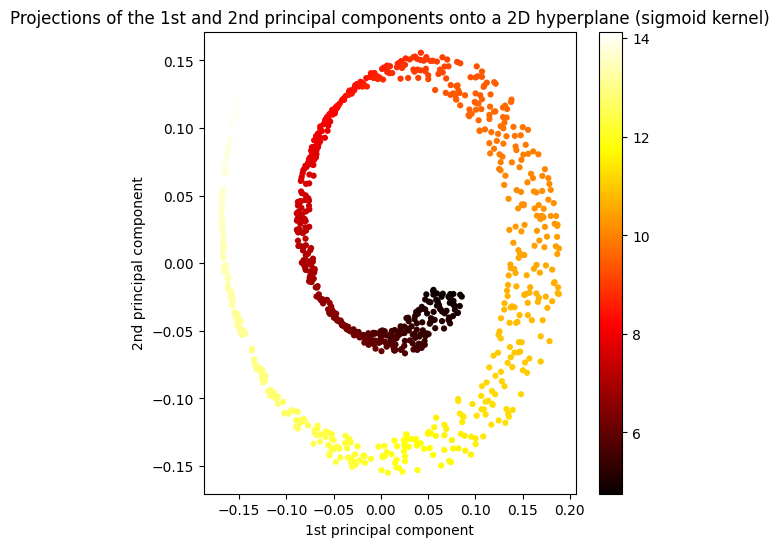

In [68]:
plt.figure(figsize=(6, 6))
plt.scatter(pca_sig.transform(X_sw)[:, 0], pca_sig.transform(X_sw)[:, 1],
            c=y_sw, edgecolor='none', s=20, cmap='hot')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.title('Projections of the 1st and 2nd principal components onto a 2D hyperplane (sigmoid kernel)')
plt.colorbar()
plt.show()

In [69]:
# TODO: Explain and compare the results.

In [133]:
# 5. Using kPCA and a kernel of your choice, apply Logistic Regression for classification.
#    Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best
#    classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV.
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons

X_mo, y_mo = make_moons(n_samples=1000, noise=0.1, random_state=42)

pipeline = Pipeline([
    ("kpca", KernelPCA(n_components=2, kernel='sigmoid', random_state=42)),
    ("log_reg", LogisticRegression())
])

param_grid = {
    "kpca__gamma": np.logspace(0.01, 100, 10),
    "kpca__coef0": np.logspace(0.01, 100, 10)
}

In [134]:
# Apply GridSearchCV to find the best parameters for the moon-like dataset
grid_search_moon = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search_moon.fit(X_mo, y_mo)

# Print out the best parameters found by GridSearchCV for the moon-like dataset
best_params_moon = grid_search_moon.best_params_
best_score_moon = grid_search_moon.best_score_
best_params_moon, best_score_moon

({'kpca__coef0': 1.023292992280754, 'kpca__gamma': 1.023292992280754}, 0.873)

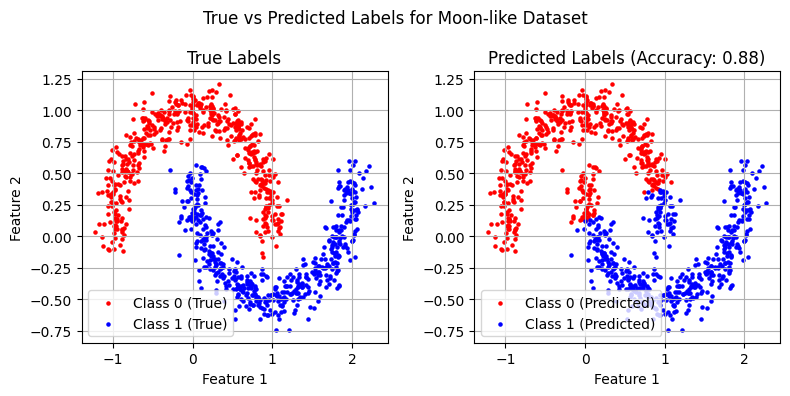

In [136]:
# 6. Plot the results from using GridSearchCV in (5).

from sklearn.metrics import accuracy_score

y_moon_pred = grid_search_moon.predict(X_mo)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_mo, y_moon_pred)

# Plot the true labels and predicted labels side-by-side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot with true labels
axs[0].scatter(X_mo[y_mo == 0, 0], X_mo[y_mo == 0, 1],
               c='red', label='Class 0 (True)', s=5)
axs[0].scatter(X_mo[y_mo == 1, 0], X_mo[y_mo == 1, 1],
               c='blue', label='Class 1 (True)', s=5)
axs[0].set_title('True Labels')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend()
axs[0].grid(True)

# Plot with predicted labels
axs[1].scatter(X_mo[y_moon_pred == 0, 0], X_mo[y_moon_pred == 0, 1],
               c='red', label=f'Class 0 (Predicted)', s=5)
axs[1].scatter(X_mo[y_moon_pred == 1, 0], X_mo[y_moon_pred == 1, 1],
               c='blue', label=f'Class 1 (Predicted)', s=5)
axs[1].set_title(f'Predicted Labels (Accuracy: {accuracy:.2f})')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].legend()
axs[1].grid(True)

plt.suptitle('True vs Predicted Labels for Moon-like Dataset')
plt.tight_layout()
plt.show()

In [ ]:
# TODO: 7. Create a video discussing the code and result for each question.
#   Discuss challenges you confronted and solutions to overcoming them, if applicable.